<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# type your code here
df = pd.read_csv('fish.csv')
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))

In [5]:
encode = pd.get_dummies(df['Species'],drop_first=True)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [8]:
x = pd.concat([X,encode],axis=1)
x.head()

,0,1,2,3,4,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,0,0,0,0,0,0
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,0,0,0,0,0,0
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,0,0,0,0,0,0
3,0.005302,0.054694,0.196390,0.879771,0.022621,0,0,0,0,0,0
4,0.025372,0.054694,0.239592,0.812835,0.426371,0,0,0,0,0,0


In [13]:
lr = LinearRegression()
model = lr.fit(X,y)

In [14]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

In [15]:
train_mse = mean_squared_error(Y_train,ypred_train)
test_mse = mean_squared_error(Y_test,ypred_test)

In [16]:
print('the RMSE of train data is',np.sqrt(train_mse))
print('the RMSE of test data is',np.sqrt(test_mse))

the RMSE of train data is 0.35130023733534793
the RMSE of test data is 0.27831128075396744


In [17]:
#inference : there is significant drop in RMSE, campartively from train data, the test data RMSE is less, 
#so model can be said it as overfit model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
#multicollinearity can be observed by VIF or OLS model

In [18]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = sm.add_constant(X)
X = pd.concat([X,encode],axis=1)

In [19]:
model_OLS = sm.OLS(y,X).fit()
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           9.67e-82
Time:                        16:28:54   Log-Likelihood:                -7.3457
No. Observations:                 159   AIC:                             38.69
Df Residuals:                     147   BIC:                             75.52
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2510      0.236     -1.062      0.2

In [20]:
#as the condition number in between 100 - 1000, moderate multicolinearity existsin model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)

In [23]:
ypred_test_lr = model.predict(X_test)

In [24]:
test_rmse_lr = mean_squared_error(ypred_test_lr,Y_test)
print('The RMSE of Linear Regrission on test data is ',np.sqrt(test_rmse_lr))

The RMSE of Linear Regrission on test data is  0.22355057201218592


In [25]:
ridge = Ridge(alpha=1.5)
model_ridge = ridge.fit(X_train,Y_train)
ypred_test_ridge = model_ridge.predict(X_test)
rmse_ridge_test = mean_squared_error(ypred_test_ridge,Y_test)
print('The RMSE of Riidge Regrission on test data is ',np.sqrt(rmse_ridge_test))

The RMSE of Riidge Regrission on test data is  0.21576809390002996


In [26]:
print('The difference RMSE between models is ',np.sqrt(test_rmse_lr)-np.sqrt(rmse_ridge_test))

The difference RMSE between models is  0.0077824781121559605


In [27]:
# # The RMSE obtained in reg model is less when compared to OLS model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

lr = LinearRegression()
model = lr.fit(X_train,Y_train)
model.coef_

array([[-2.34761475,  2.12445728,  1.47408608,  0.14933787, -0.09219748,
         0.6299368 ,  0.65928123, -0.36752955,  0.42034048,  1.47396791,
         0.48527451]])

In [29]:
SGD = SGDRegressor()
model_SGD = SGD.fit(X_train,Y_train)
model_SGD.coef_

array([ 0.23009765,  0.22843706,  0.21672077,  0.13741639,  0.20686547,
       -0.01068983,  0.01022117, -0.00976805, -0.06134839,  0.08943288,
        0.00688484])

In [30]:
def plot_coefficients(model, algorithm_name):
    
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_.flatten()})

    
    #sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    
    sns.barplot(x = "Coefficient", y = "Variable", data = df_coeff)
    
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

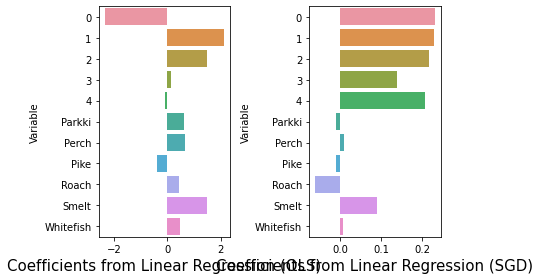

In [31]:
plt.subplot(1,2,1)
plot_coefficients(model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(model_SGD, 'Linear Regression (SGD)')

plt.tight_layout()

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
lasso = Lasso(alpha=0.1)
model_las = lasso.fit(X_train,Y_train)
model_las.coef_

array([ 0.        ,  0.14414781,  0.46788836,  0.        ,  0.26907029,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ])

In [34]:
frame=pd.DataFrame({'Variable':X_train.columns,'Coeff':model_las.coef_})
frame

,Variable,Coeff
0,0,0.000000
1,1,0.144148
2,2,0.467888
3,3,0.000000
4,4,0.269070
5,Parkki,-0.000000
6,Perch,-0.000000
7,Pike,-0.000000
8,Roach,-0.000000
9,Smelt,0.000000


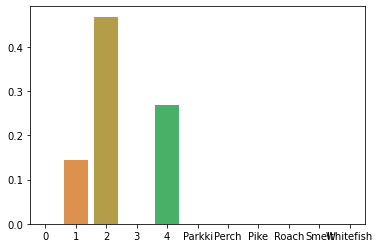

In [35]:
sns.barplot(y=model_las.coef_,x=X.columns)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100
3,Bream,363.000000,26.300000,29.000000,33.500000,12.730000,4.455500
4,Bream,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000


In [37]:
df[['Width','Weight']].corr()

,Width,Weight
Width,1.000000,0.886960
Weight,0.886960,1.000000


In [38]:
X = ss.fit_transform(df[['Width']])
y = ss.fit_transform(df[['Weight']])
X = sm.add_constant(X)
model = sm.OLS(y,X).fit().summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     579.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.52e-54
Time:                        16:32:03   Log-Likelihood:                -102.78
No. Observations:                 159   AIC:                             209.6
Df Residuals:                     157   BIC:                             215.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.76e-17      0.037  -2.38e-15      1.0

In [39]:
#based on pvalue we can conclude that it is significant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [40]:
# type your code here
param = [{'alpha' :[0.00001, 0.001, 0.1, 10, 100]}]

In [41]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

ridge = Ridge()

In [42]:
grid_ridge = GridSearchCV(estimator=ridge,
            param_grid=param,
            cv=5)
grid_ridge.fit(X_train,Y_train)
print('Best parameters for Ridge Regression: ', grid_ridge.best_params_)

Best parameters for Ridge Regression:  {'alpha': 0.1}


In [43]:
ridge = Ridge(alpha=0.1)
prof = ridge.fit(X_train,Y_train)
ypred = prof.predict(X_test)
mse_prof = mean_squared_error(ypred,Y_test)
print('The RMSE of Ridge Regression is ',np.sqrt(mse_prof))

The RMSE of Ridge Regression is  0.2156938068118691


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [44]:
# type your code here
param = [{'alpha' :[0.0001, 0.001, 0.01, 0.1, 1]}]

In [45]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

elastic = ElasticNet()

In [46]:
grid_elastic = GridSearchCV(estimator=elastic,
            param_grid=param,
            cv=5)
grid_elastic.fit(X_train,Y_train)
print('Best parameters for Ridge Regression: ', grid_elastic.best_params_)

Best parameters for Ridge Regression:  {'alpha': 0.001}


In [47]:
elastic = ElasticNet(alpha=0.001)
professor = elastic.fit(X_train,Y_train)
ypred = professor.predict(X_test)
mse_professor = mean_squared_error(ypred,Y_test)
print('The RMSE of Ridge Regression is ',np.sqrt(mse_professor))

The RMSE of Ridge Regression is  0.2115285760586591


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [48]:
# type your code here
param = [{'alpha' :[0.0001, 0.001, 0.1, 1, 2, 3]}]

In [49]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

lasso = Lasso()

In [50]:
grid_lasso = GridSearchCV(estimator=lasso,
            param_grid=param,
            cv=5)
grid_lasso.fit(X_train,Y_train)
print('Best parameters for Ridge Regression: ', grid_lasso.best_params_)

Best parameters for Ridge Regression:  {'alpha': 0.001}


In [51]:
lasso = Lasso(alpha=0.001)
model_lasso = lasso.fit(X_train,Y_train)
ypred = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(ypred,Y_test)
print('The RMSE of Ridge Regression is ',np.sqrt(mse_lasso))

The RMSE of Ridge Regression is  0.2079267469607952


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
tuned_paramaters = [{'alpha':[0.1],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

In [53]:
X = pd.DataFrame(ss.fit_transform(df.drop(['Species','Weight'],axis=1)))
y = pd.DataFrame(ss.fit_transform(df[['Weight']]))
X = pd.concat([X,encode],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)
elastic = ElasticNet()

In [54]:
grid_elastic = GridSearchCV(estimator=elastic,
            param_grid=tuned_paramaters,
            cv=5)
grid_elastic.fit(X_train,Y_train)
print('Best parameters for Elastic Regression: ', grid_elastic.best_params_)

Best parameters for Elastic Regression:  {'alpha': 0.1, 'l1_ratio': 0.0001}


In [55]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.0001)
professor = elastic.fit(X_train,Y_train)
ypred = professor.predict(X_test)
mse_professor = mean_squared_error(ypred,Y_test)
print('The RMSE of Elastic Regression is ',np.sqrt(mse_professor))

The RMSE of Elastic Regression is  0.25425010213007165
